In [307]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification #data를 생성하는 함수

from sklearn.svm import SVC, SVR #Support Vector Classifier, Support Vector Regression
from xgboost import XGBClassifier, plot_tree

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm

In [465]:
df = pd.read_csv('train_dataset.csv')

In [350]:
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [5]:
df.describe()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,1831.500000,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,...,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,1057.850021,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,...,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,0.000000,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,915.750000,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,1831.500000,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,2747.250000,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,3663.000000,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,...,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [7]:
df.isna().sum()

Unnamed: 0                 0
url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [476]:
df.fillna(method='ffill', inplace=True)

In [477]:
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
under_per_length           0
hyphen_per_len             0
dtype: int64

## 단변량 분석

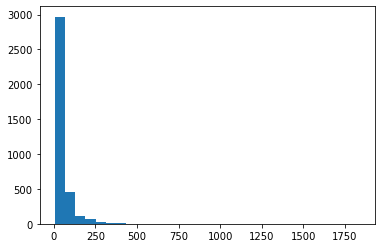

In [14]:
plt.hist(df['url_len'], bins=30)
plt.show()
# 길수록 불량?

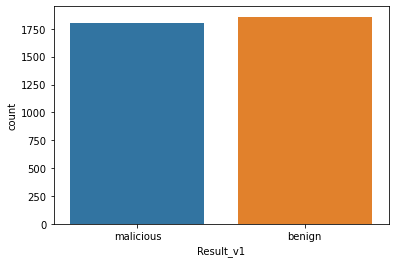

In [19]:
sns.countplot(df['Result_v1'])
plt.show()

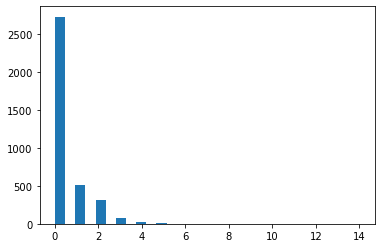

In [25]:
plt.hist(df['url_num_hyphens_dom'], bins=30)
plt.show()

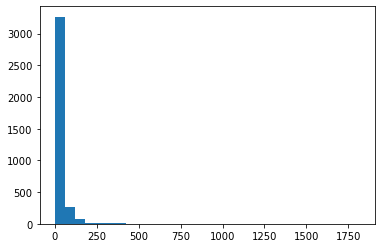

In [24]:
plt.hist(df['url_path_len'], bins=30)
plt.show()

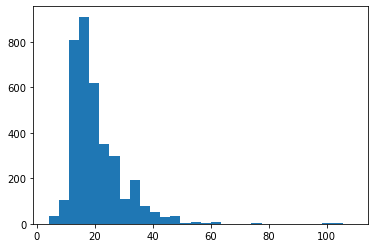

In [23]:
plt.hist(df['url_domain_len'], bins=30)
plt.show()

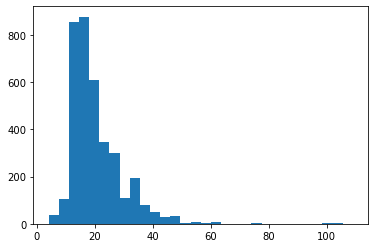

In [26]:
plt.hist(df['url_hostname_len'], bins=30)
plt.show()

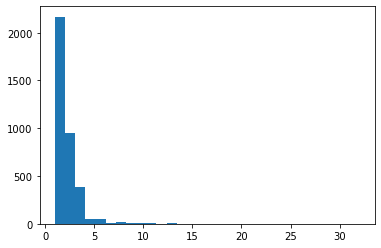

In [27]:
plt.hist(df['url_num_dots'], bins=30)
plt.show()

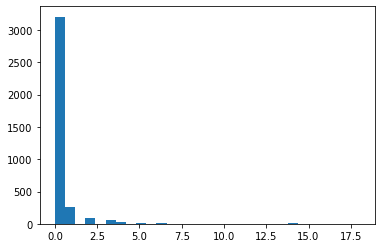

In [28]:
plt.hist(df['url_num_underscores'], bins=30)
plt.show()

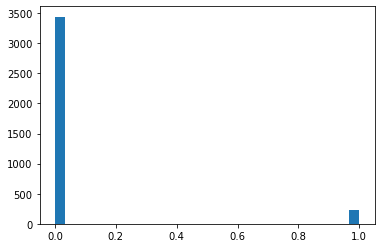

In [29]:
plt.hist(df['url_ip_present'], bins=30)
plt.show()

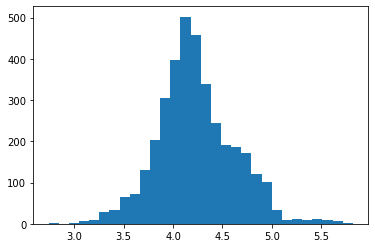

In [30]:
plt.hist(df['url_entropy'], bins=30)
plt.show()

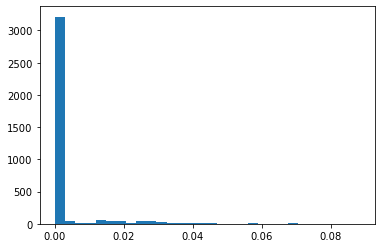

In [496]:
plt.hist(df['under_per_length'], bins=30)
plt.show()

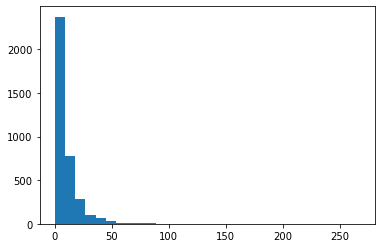

In [32]:
plt.hist(df["html_num_tags('script')"], bins=30)
plt.show()

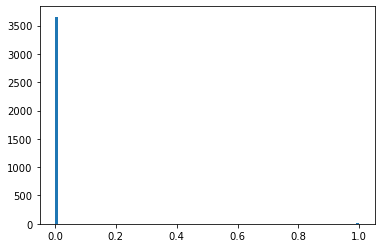

In [35]:
plt.hist(df["url_port"], bins=100)
plt.show()

## 이변량 분석

In [37]:
import scipy.stats as spst

 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port  

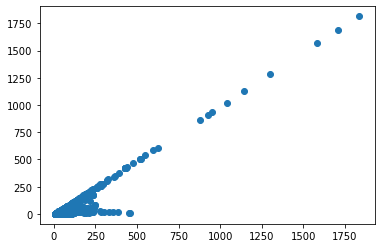

(0.9430424093782788, 0.0)

In [38]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_path_len'])
plt.show()

spst.pearsonr(df['url_len'], df['url_path_len'])

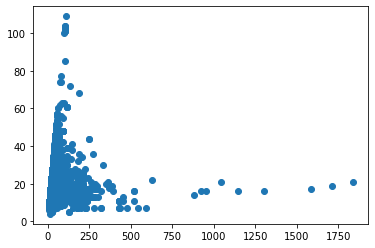

(0.00411734110646473, 0.8032503814819018)

In [40]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_hostname_len'])
plt.show()

spst.pearsonr(df['url_len'], df['url_hostname_len'])

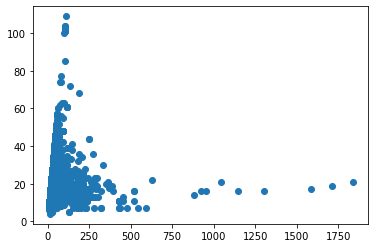

(0.00382524674677609, 0.8169514061404903)

In [41]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_domain_len'])
plt.show()

spst.pearsonr(df['url_len'], df['url_domain_len'])

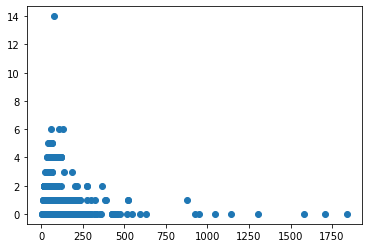

(-0.022953421360247278, 0.16480170578627767)

In [42]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_num_hyphens_dom'])
plt.show()

spst.pearsonr(df['url_len'], df['url_num_hyphens_dom'])

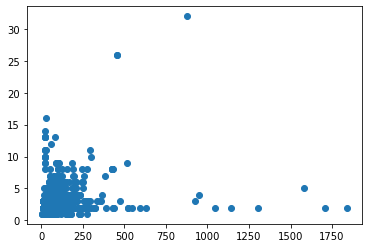

(0.26584561414223007, 2.56885194171682e-60)

In [43]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_num_dots'])
plt.show()

spst.pearsonr(df['url_len'], df['url_num_dots'])

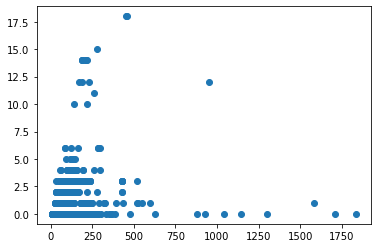

(0.3136101588754654, 1.9767917459887443e-84)

In [44]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_num_underscores'])
plt.show()

spst.pearsonr(df['url_len'], df['url_num_underscores'])

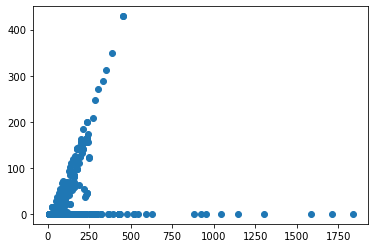

(0.3259161711664971, 2.03254280265566e-91)

In [45]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_query_len'])
plt.show()

spst.pearsonr(df['url_len'], df['url_query_len'])

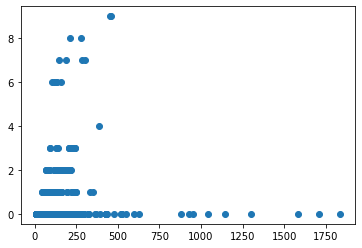

(0.27524002174511075, 1.079749111084607e-64)

In [46]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_num_query_para'])
plt.show()

spst.pearsonr(df['url_len'], df['url_num_query_para'])

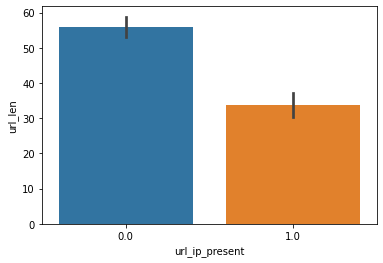

Ttest_indResult(statistic=39.98902998777704, pvalue=0.0)

In [52]:
# url_len과 url_ip_present
sns.barplot(df['url_ip_present'], df['url_len'])
plt.show()

spst.ttest_ind(df['url_len'], df['url_ip_present'])

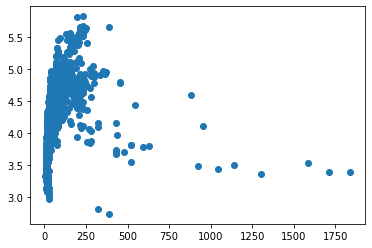

(0.27169526794650245, 5.072392807386014e-63)

In [53]:
# url_len과 url_path_len
plt.scatter(df['url_len'], df['url_entropy'])
plt.show()

spst.pearsonr(df['url_len'], df['url_entropy'])

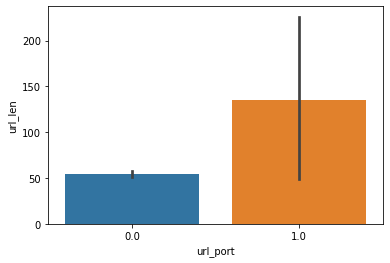

Ttest_indResult(statistic=40.0322484110084, pvalue=0.0)

In [59]:
sns.barplot(df['url_port'], df['url_len'])
plt.show()

spst.ttest_ind(df['url_len'], df['url_port'])

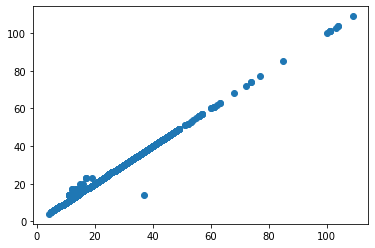

(0.9981654747336223, 0.0)

In [60]:
# hostname과 domain
plt.scatter(df['url_hostname_len'], df['url_domain_len'])
plt.show()

spst.pearsonr(df['url_hostname_len'], df['url_domain_len'])

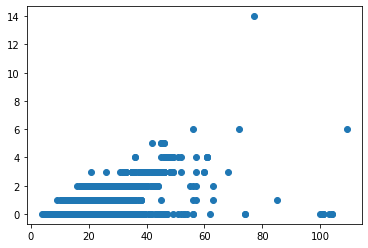

(0.596239725608397, 0.0)

In [61]:
# hostname과 하이픈
plt.scatter(df['url_hostname_len'], df['url_num_hyphens_dom'])
plt.show()

spst.pearsonr(df['url_hostname_len'], df['url_num_hyphens_dom'])

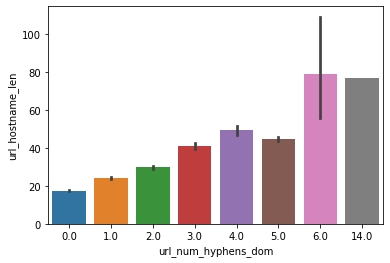

Ttest_indResult(statistic=124.7382587219385, pvalue=0.0)

In [65]:
sns.barplot(df['url_num_hyphens_dom'], df['url_hostname_len'])
plt.show()

spst.ttest_ind(df['url_hostname_len'], df['url_num_hyphens_dom'])

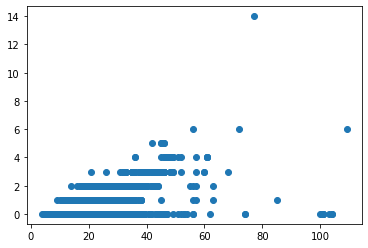

(0.5942122800547486, 0.0)

In [66]:
#domain과 하이픈
plt.scatter(df['url_domain_len'], df['url_num_hyphens_dom'])
plt.show()

spst.pearsonr(df['url_domain_len'], df['url_num_hyphens_dom'])

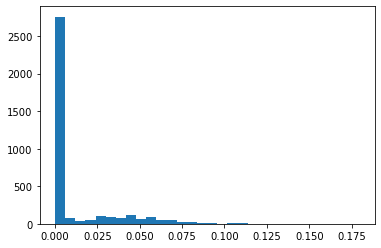

In [500]:
plt.hist(df['hyphen_per_len'], bins=30)
plt.show()

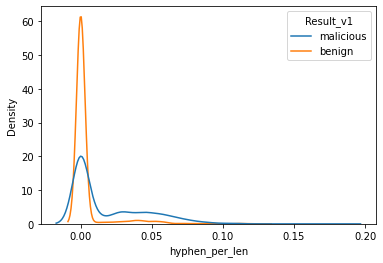

Optimization terminated successfully.
         Current function value: 0.642484
         Iterations 6
hyphen_per_len    5.166972e-56
dtype: float64


In [502]:
sns.kdeplot(x='hyphen_per_len', data = df, hue ='Result_v1')
plt.show()

model = sm.Logit(tmp['Result_v1'], df['hyphen_per_len'])
result = model.fit()
print(result.pvalues)

In [77]:
tmp = df[['Result_v1']]
tmp = tmp.replace(['malicious', 'benign'], [0, 1])

In [78]:
tmp['Result_v1']

0       0
1       1
2       1
3       1
4       1
       ..
3659    0
3660    1
3661    0
3662    1
3663    1
Name: Result_v1, Length: 3664, dtype: int64

In [90]:
model = sm.Logit(tmp['Result_v1'], df['url_entropy'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.941981
dtype: float64


Result_v1         0         1
url_port                     
0.0        0.493162  0.506838
1.0        0.375000  0.625000


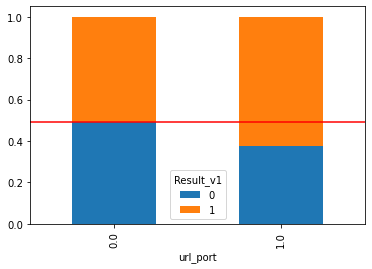

카이제곱통계량 1.5827876508716454
p-value 0.2083596114290871
기대빈도
 [[0.43408096 0.56591904]
 [0.43408096 0.56591904]]


In [104]:
temp = pd.crosstab(df['url_port'], tmp['Result_v1'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-tmp['Result_v1'].mean(), color = 'r')
plt.show()
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

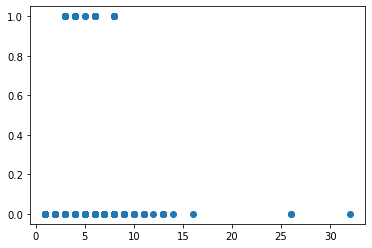

(0.1865974338566557, 4.622686114486321e-30)

In [178]:
plt.scatter(df['url_num_dots'], df['url_ip_present'])
plt.show()

spst.pearsonr(df['url_ip_present'], df['url_num_dots'])

In [ ]:
plt.scatter(df['url_query_len'], df['url_num_query_para'])
plt.show()

spst.pearsonr(df['url_query_len'], df['url_num_query_para'])

In [466]:
drop_cols = ['Unnamed: 0']

In [467]:
df.drop(columns=drop_cols, axis=1, inplace=True)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_num_query_para       3664 non-null   float64
 8   url_ip_present           3664 non-null   float64
 9   html_num_tags('iframe')  3664 non-null   float64
 10  html_num_tags('script')  3664 non-null   float64
 11  html_num_tags('embed')   3664 non-null   float64
 12  html_num_tags('object')  3664 non-null   float64
 13  html_num_tags('div')     3664 non-null   float64
 14  html_num_tags('head')   

In [ ]:
plt.hist(df["html_num_tags('iframe')"], bins=30)
plt.show()

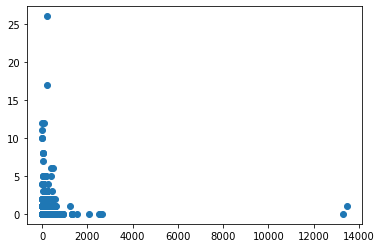

(0.05164653679449737, 0.0017645820274244525)

In [147]:
# html 확인
plt.scatter(df["html_num_tags('a')"], df["html_num_tags('iframe')"])
plt.show()

spst.pearsonr(df["html_num_tags('a')"], df["html_num_tags('iframe')"])

In [158]:
model = sm.Logit(tmp['Result_v1'], df["html_num_tags('iframe')"])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692840
         Iterations 4
html_num_tags('iframe')    0.146136
dtype: float64


In [168]:
drop_cols = ["html_num_tags('applet')", "html_num_tags('body')"]

In [170]:
df.drop(columns=drop_cols, axis=1, inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3664 non-null   float64
 1   url_path_len             3664 non-null   float64
 2   url_domain_len           3664 non-null   float64
 3   url_hostname_len         3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_num_query_para       3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   html_num_tags('iframe')  3664 non-null   float64
 9   html_num_tags('script')  3664 non-null   float64
 10  html_num_tags('embed')   3664 non-null   float64
 11  html_num_tags('object')  3664 non-null   float64
 12  html_num_tags('div')     3664 non-null   float64
 13  html_num_tags('head')    3664 non-null   float64
 14  html_num_tags('form')   

In [172]:
df.isna().sum()

url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_num_query_para         0
url_ip_present             0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('form')      0
html_num_tags('a')         0
Result_v1                  0
dtype: int64

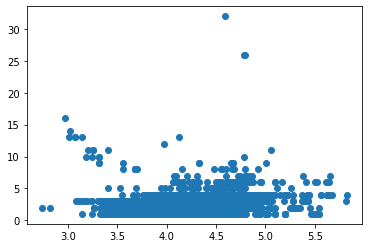

(0.18675486369259753, 4.1314948270820734e-30)

In [507]:
plt.scatter(df['url_entropy'], df['url_num_dots'])
plt.show()
spst.pearsonr(df['url_entropy'], df['url_num_dots'])

## feature engineering

In [468]:
df['under_per_length'] = df['url_num_underscores'] / df['url_len']

In [469]:
model = sm.Logit(tmp['Result_v1'], df['under_per_length'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.671751
         Iterations 6
under_per_length    1.831295e-24
dtype: float64


In [470]:
df['hyphen_per_len'] = df['url_num_hyphens_dom'] / df['url_len']

In [471]:
model = sm.Logit(tmp['Result_v1'], tmp_pdh)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.642484
         Iterations 6
x1    5.166972e-56
dtype: float64


In [ ]:
drop_cols = ['']

In [525]:
df.drop(columns='entropy_per_dots', axis=1, inplace=True)

In [509]:
df['entropy_per_dots'] = df['url_entropy']/df['url_num_dots']
model = sm.Logit(tmp['Result_v1'], testing)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.688916
         Iterations 4
x1    2.955912e-08
dtype: float64


In [542]:
drop_cols = ['url_chinese_present', 'url_port', "html_num_tags('head')", "html_num_tags('applet')"]

In [544]:
test_data.drop(columns=drop_cols, axis=1, inplace=True)

In [530]:
df['domain+hostname'] = df['url_domain_len'] + df['url_hostname_len']
model = sm.Logit(tmp['Result_v1'], testing)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.681793
         Iterations 4
x1    2.604655e-19
dtype: float64


## data 분할

In [545]:
target =['Result_v1']

In [546]:
x = df.drop(columns=target, axis=1)
y = df.loc[:, target]

In [547]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

## 스케일링

In [361]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 모델링

In [185]:
# 모델링을 위해
from sklearn.svm import SVC #classifier

# Grid search
from sklearn.model_selection import GridSearchCV

# 평가를 위해.
from sklearn.metrics import *

In [186]:
params = {
    'C': [1, 3, 5, 10],
    'gamma': np.linspace(0.01, 1, 20)
}

In [188]:
model = SVC()
m_gs = GridSearchCV(model, params, cv=5, verbose=3)

In [189]:
m_gs.fit(x_train_s, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ................................C=1, gamma=0.01; total time=   0.3s
[CV 2/5] END ................................C=1, gamma=0.01; total time=   0.2s
[CV 3/5] END ................................C=1, gamma=0.01; total time=   0.3s
[CV 4/5] END ................................C=1, gamma=0.01; total time=   0.3s
[CV 5/5] END ................................C=1, gamma=0.01; total time=   0.2s
[CV 1/5] END .................C=1, gamma=0.06210526315789474; total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.06210526315789474; total time=   0.4s
[CV 3/5] END .................C=1, gamma=0.06210526315789474; total time=   0.2s
[CV 4/5] END .................C=1, gamma=0.06210526315789474; total time=   0.2s
[CV 5/5] END .................C=1, gamma=0.06210526315789474; total time=   0.2s
[CV 1/5] END .................C=1, gamma=0.11421052631578947; total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.1142

[CV 2/5] END ................................C=3, gamma=0.01; total time=   0.2s
[CV 3/5] END ................................C=3, gamma=0.01; total time=   0.2s
[CV 4/5] END ................................C=3, gamma=0.01; total time=   0.2s
[CV 5/5] END ................................C=3, gamma=0.01; total time=   0.2s
[CV 1/5] END .................C=3, gamma=0.06210526315789474; total time=   0.2s
[CV 2/5] END .................C=3, gamma=0.06210526315789474; total time=   0.2s
[CV 3/5] END .................C=3, gamma=0.06210526315789474; total time=   0.2s
[CV 4/5] END .................C=3, gamma=0.06210526315789474; total time=   0.2s
[CV 5/5] END .................C=3, gamma=0.06210526315789474; total time=   0.2s
[CV 1/5] END .................C=3, gamma=0.11421052631578947; total time=   0.3s
[CV 2/5] END .................C=3, gamma=0.11421052631578947; total time=   0.2s
[CV 3/5] END .................C=3, gamma=0.11421052631578947; total time=   0.2s
[CV 4/5] END ...............

[CV 4/5] END ................................C=5, gamma=0.01; total time=   0.2s
[CV 5/5] END ................................C=5, gamma=0.01; total time=   0.3s
[CV 1/5] END .................C=5, gamma=0.06210526315789474; total time=   0.2s
[CV 2/5] END .................C=5, gamma=0.06210526315789474; total time=   0.1s
[CV 3/5] END .................C=5, gamma=0.06210526315789474; total time=   0.2s
[CV 4/5] END .................C=5, gamma=0.06210526315789474; total time=   0.2s
[CV 5/5] END .................C=5, gamma=0.06210526315789474; total time=   0.2s
[CV 1/5] END .................C=5, gamma=0.11421052631578947; total time=   0.1s
[CV 2/5] END .................C=5, gamma=0.11421052631578947; total time=   0.2s
[CV 3/5] END .................C=5, gamma=0.11421052631578947; total time=   0.1s
[CV 4/5] END .................C=5, gamma=0.11421052631578947; total time=   0.2s
[CV 5/5] END .................C=5, gamma=0.11421052631578947; total time=   0.3s
[CV 1/5] END ...............

[CV 1/5] END ................C=10, gamma=0.06210526315789474; total time=   0.1s
[CV 2/5] END ................C=10, gamma=0.06210526315789474; total time=   0.1s
[CV 3/5] END ................C=10, gamma=0.06210526315789474; total time=   0.2s
[CV 4/5] END ................C=10, gamma=0.06210526315789474; total time=   0.2s
[CV 5/5] END ................C=10, gamma=0.06210526315789474; total time=   0.1s
[CV 1/5] END ................C=10, gamma=0.11421052631578947; total time=   0.1s
[CV 2/5] END ................C=10, gamma=0.11421052631578947; total time=   0.1s
[CV 3/5] END ................C=10, gamma=0.11421052631578947; total time=   0.1s
[CV 4/5] END ................C=10, gamma=0.11421052631578947; total time=   0.1s
[CV 5/5] END ................C=10, gamma=0.11421052631578947; total time=   0.1s
[CV 1/5] END ................C=10, gamma=0.16631578947368422; total time=   0.1s
[CV 2/5] END ................C=10, gamma=0.16631578947368422; total time=   0.2s
[CV 3/5] END ...............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 10],
                         'gamma': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])},
             verbose=3)

In [190]:
m_gs.best_score_

0.8307367811890838

In [192]:
m_gs.cv_results_

{'mean_fit_time': array([0.24080949, 0.22139993, 0.19255061, 0.17687893, 0.18206263,
        0.19411545, 0.17601008, 0.16448569, 0.1638114 , 0.18499446,
        0.15811968, 0.16388006, 0.15714855, 0.18186874, 0.15814204,
        0.15592122, 0.15572848, 0.15718184, 0.18199482, 0.15178132,
        0.21809535, 0.17973433, 0.18466015, 0.16532917, 0.15719762,
        0.15739479, 0.178479  , 0.15254269, 0.15540662, 0.15000801,
        0.15695562, 0.16279645, 0.14975591, 0.15091691, 0.14959731,
        0.17276883, 0.15043044, 0.1472374 , 0.14758291, 0.14866018,
        0.22144275, 0.16808014, 0.17692561, 0.1866951 , 0.18296885,
        0.15589724, 0.15162973, 0.15030684, 0.1613112 , 0.15900602,
        0.14918928, 0.14395938, 0.14285822, 0.16113844, 0.15199504,
        0.14037066, 0.14514513, 0.13971577, 0.1526495 , 0.15321126,
        0.1879252 , 0.16358724, 0.15483942, 0.17867584, 0.15269289,
        0.14284797, 0.1477283 , 0.15332079, 0.17402992, 0.14284706,
        0.14022255, 0.14520421,

In [193]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240809,0.010344,0.116805,0.001226,1,0.01,"{'C': 1, 'gamma': 0.01}",0.561404,0.547758,0.571150,0.561404,0.583984,0.565140,0.012011,80
1,0.221400,0.038310,0.116009,0.024632,1,0.062105,"{'C': 1, 'gamma': 0.06210526315789474}",0.676413,0.705653,0.719298,0.682261,0.708984,0.698522,0.016402,78
2,0.192551,0.014278,0.101409,0.003553,1,0.114211,"{'C': 1, 'gamma': 0.11421052631578947}",0.707602,0.730994,0.746589,0.721248,0.716797,0.724646,0.013307,75
3,0.176879,0.003852,0.095434,0.004917,1,0.166316,"{'C': 1, 'gamma': 0.16631578947368422}",0.719298,0.736842,0.758285,0.734893,0.734375,0.736739,0.012469,74
4,0.182063,0.003946,0.097147,0.013209,1,0.218421,"{'C': 1, 'gamma': 0.21842105263157896}",0.727096,0.750487,0.762183,0.740741,0.742188,0.744539,0.011584,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.139377,0.007731,0.062441,0.001891,10,0.791579,"{'C': 10, 'gamma': 0.791578947368421}",0.816764,0.822612,0.822612,0.830409,0.843750,0.827230,0.009330,4
76,0.139763,0.002624,0.063859,0.000759,10,0.843684,"{'C': 10, 'gamma': 0.8436842105263158}",0.816764,0.820663,0.826511,0.830409,0.841797,0.827229,0.008666,5
77,0.134905,0.006701,0.064835,0.005442,10,0.895789,"{'C': 10, 'gamma': 0.8957894736842106}",0.816764,0.820663,0.830409,0.832359,0.837891,0.827617,0.007771,3
78,0.157417,0.027209,0.079755,0.020378,10,0.947895,"{'C': 10, 'gamma': 0.9478947368421053}",0.816764,0.822612,0.836257,0.836257,0.837891,0.829956,0.008606,2


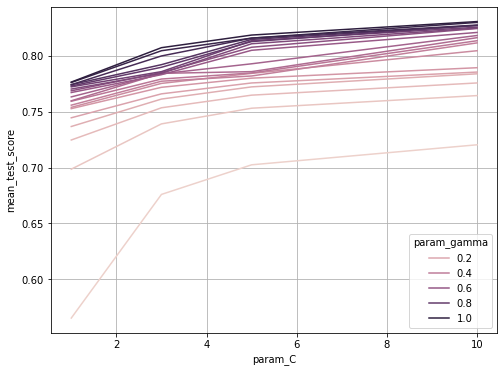

In [194]:
results = pd.DataFrame(m_gs.cv_results_)
show = results.loc[:, ['param_C', 'mean_test_score', 'param_gamma']]

plt.figure(figsize=(8, 6))
sns.lineplot(x = 'param_C', y='mean_test_score', data=show, hue='param_gamma')
plt.grid()
plt.show()

In [195]:
pred = m_gs.predict(x_val_s)


In [197]:
print(pred)

['benign' 'benign' 'malicious' ... 'benign' 'benign' 'malicious']


In [196]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[501  59]
 [119 421]]
              precision    recall  f1-score   support

      benign       0.81      0.89      0.85       560
   malicious       0.88      0.78      0.83       540

    accuracy                           0.84      1100
   macro avg       0.84      0.84      0.84      1100
weighted avg       0.84      0.84      0.84      1100



## 제출하기

In [481]:
test_data = pd.DataFrame(pd.read_csv('test_dataset_v01.csv'))

In [482]:
drop_columns = ['Unnamed: 0']

In [483]:
test_data = test_data.drop(columns=drop_columns, axis=1)

In [484]:
test_data.fillna(method='ffill', inplace=True)

In [372]:
test_data

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_num_query_para,url_ip_present,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('form'),html_num_tags('a')
0,97,0,80.0,17.0,17.0,4,0,0,0,0,5.0,0,0,12,1,1.0,3.0
1,37,0,22.0,15.0,15.0,3,1,0,0,1,5.0,0,0,158,1,1.0,3.0
2,44,0,22.0,20.0,20.0,3,3,0,0,0,6.0,3,3,34,1,0.0,136.0
3,40,0,14.0,26.0,26.0,2,0,0,0,0,6.0,0,0,29,1,1.0,2.0
4,43,2,14.0,26.0,26.0,2,0,0,0,0,6.0,0,0,41,1,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,15.0,17.0,45.0,4,2,0,0,1,18.0,0,0,79,1,1.0,119.0
2437,36,0,1.0,35.0,35.0,2,0,0,0,0,27.0,0,0,57,1,1.0,119.0
2438,45,1,23.0,22.0,35.0,2,0,0,0,0,8.0,0,0,199,1,2.0,119.0
2439,24,0,10.0,14.0,35.0,3,0,0,1,0,3.0,0,0,90,1,2.0,25.0


In [253]:
list(x_train)

['url_num_hyphens_dom',
 'url_path_len',
 'url_domain_len',
 'url_hostname_len',
 'url_num_dots',
 'url_num_underscores',
 'url_num_query_para',
 'url_ip_present',
 "html_num_tags('iframe')",
 "html_num_tags('script')",
 "html_num_tags('embed')",
 "html_num_tags('object')",
 "html_num_tags('div')",
 "html_num_tags('head')",
 "html_num_tags('form')",
 "html_num_tags('a')"]

In [295]:
test_data=pd.DataFrame(scaler.fit_transform(test_data), columns=list(x_train))

In [255]:
test_data

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_num_query_para,url_ip_present,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('form'),html_num_tags('a')
0,0.000000,0.049050,0.135417,0.136842,0.130435,0.000000,0.0,0.0,0.000000,0.031646,0.0,0.0,0.003108,0.111111,0.052632,0.000253
1,0.000000,0.013489,0.114583,0.115789,0.086957,0.052632,0.0,0.0,0.038462,0.031646,0.0,0.0,0.040922,0.111111,0.052632,0.000253
2,0.000000,0.013489,0.166667,0.168421,0.086957,0.157895,0.0,0.0,0.000000,0.037975,1.0,0.5,0.008806,0.111111,0.000000,0.011459
3,0.000000,0.008584,0.229167,0.231579,0.043478,0.000000,0.0,0.0,0.000000,0.037975,0.0,0.0,0.007511,0.111111,0.052632,0.000169
4,0.333333,0.008584,0.229167,0.231579,0.043478,0.000000,0.0,0.0,0.000000,0.037975,0.0,0.0,0.010619,0.111111,0.052632,0.000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,0.000000,0.009197,0.135417,0.431579,0.130435,0.105263,0.0,0.0,0.038462,0.113924,0.0,0.0,0.020461,0.111111,0.052632,0.010027
2437,0.000000,0.000613,0.322917,0.326316,0.043478,0.000000,0.0,0.0,0.000000,0.170886,0.0,0.0,0.014763,0.111111,0.052632,0.010027
2438,0.166667,0.014102,0.187500,0.326316,0.043478,0.000000,0.0,0.0,0.000000,0.050633,0.0,0.0,0.051541,0.111111,0.105263,0.010027
2439,0.000000,0.006131,0.104167,0.326316,0.086957,0.000000,0.0,1.0,0.000000,0.018987,0.0,0.0,0.023310,0.111111,0.105263,0.002107


In [271]:
submit_pred = pd.DataFrame(m_gs.predict(test_data))

In [272]:
submit_pred.replace(['benign', 'malicious'], [1, -1], inplace=True)

In [276]:
submit_pred.loc[:, 0]

0      -1
1      -1
2       1
3      -1
4      -1
       ..
2436    1
2437   -1
2438   -1
2439   -1
2440   -1
Name: 0, Length: 2441, dtype: int64

In [277]:
len(submit_pred)

2441

In [278]:
submit = pd.DataFrame({
    'id': range(0, len(submit_pred)),
    'expected': submit_pred.loc[:, 0]
})

In [281]:
submit.to_csv('submission.csv',index = False)

In [503]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

## 모델링2 : 랜덤포레스트

In [485]:
test_data['under_per_length'] = test_data['url_num_underscores'] / test_data['url_len']

In [486]:
test_data['hyphen_per_len'] = test_data['url_num_hyphens_dom'] / test_data['url_len']

In [534]:
test_data['domain+hostname'] = test_data['url_domain_len'] + test_data['url_hostname_len']

In [535]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   int64  
 1   url_num_hyphens_dom      2441 non-null   int64  
 2   url_path_len             2441 non-null   float64
 3   url_domain_len           2441 non-null   float64
 4   url_hostname_len         2441 non-null   float64
 5   url_num_dots             2441 non-null   int64  
 6   url_num_underscores      2441 non-null   int64  
 7   url_query_len            2441 non-null   int64  
 8   url_num_query_para       2441 non-null   int64  
 9   url_ip_present           2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  url_chinese_present      2441 non-null   int64  
 12  url_port                 2441 non-null   int64  
 13  html_num_tags('iframe')  2441 non-null   int64  
 14  html_num_tags('script') 

In [517]:
from sklearn.ensemble import RandomForestClassifier 

In [518]:
model2 = RandomForestClassifier()
params = {
    'n_estimators':  range(100, 201, 50),
    'max_features': range(1, 21)
}
m2 = RandomForestClassifier()
m_gs2 = GridSearchCV(m2, params, cv=5, verbose=3)

In [548]:
m_gs2.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ...............max_features=1, n_estimators=100; total time=   0.3s
[CV 2/5] END ...............max_features=1, n_estimators=100; total time=   0.2s
[CV 3/5] END ...............max_features=1, n_estimators=100; total time=   0.1s
[CV 4/5] END ...............max_features=1, n_estimators=100; total time=   0.1s
[CV 5/5] END ...............max_features=1, n_estimators=100; total time=   0.2s
[CV 1/5] END ...............max_features=1, n_estimators=150; total time=   0.3s
[CV 2/5] END ...............max_features=1, n_estimators=150; total time=   0.3s
[CV 3/5] END ...............max_features=1, n_estimators=150; total time=   0.3s
[CV 4/5] END ...............max_features=1, n_estimators=150; total time=   0.3s
[CV 5/5] END ...............max_features=1, n_estimators=150; total time=   0.3s
[CV 1/5] END ...............max_features=1, n_estimators=200; total time=   0.4s
[CV 2/5] END ...............max_features=1, n_e

[CV 2/5] END ...............max_features=7, n_estimators=200; total time=   0.7s
[CV 3/5] END ...............max_features=7, n_estimators=200; total time=   0.7s
[CV 4/5] END ...............max_features=7, n_estimators=200; total time=   0.7s
[CV 5/5] END ...............max_features=7, n_estimators=200; total time=   0.8s
[CV 1/5] END ...............max_features=8, n_estimators=100; total time=   0.3s
[CV 2/5] END ...............max_features=8, n_estimators=100; total time=   0.4s
[CV 3/5] END ...............max_features=8, n_estimators=100; total time=   0.5s
[CV 4/5] END ...............max_features=8, n_estimators=100; total time=   0.4s
[CV 5/5] END ...............max_features=8, n_estimators=100; total time=   0.3s
[CV 1/5] END ...............max_features=8, n_estimators=150; total time=   0.5s
[CV 2/5] END ...............max_features=8, n_estimators=150; total time=   0.5s
[CV 3/5] END ...............max_features=8, n_estimators=150; total time=   0.5s
[CV 4/5] END ...............

[CV 4/5] END ..............max_features=14, n_estimators=150; total time=   0.7s
[CV 5/5] END ..............max_features=14, n_estimators=150; total time=   0.7s
[CV 1/5] END ..............max_features=14, n_estimators=200; total time=   1.2s
[CV 2/5] END ..............max_features=14, n_estimators=200; total time=   1.2s
[CV 3/5] END ..............max_features=14, n_estimators=200; total time=   1.1s
[CV 4/5] END ..............max_features=14, n_estimators=200; total time=   1.1s
[CV 5/5] END ..............max_features=14, n_estimators=200; total time=   1.2s
[CV 1/5] END ..............max_features=15, n_estimators=100; total time=   0.5s
[CV 2/5] END ..............max_features=15, n_estimators=100; total time=   0.6s
[CV 3/5] END ..............max_features=15, n_estimators=100; total time=   0.5s
[CV 4/5] END ..............max_features=15, n_estimators=100; total time=   0.5s
[CV 5/5] END ..............max_features=15, n_estimators=100; total time=   0.6s
[CV 1/5] END ..............m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': range(100, 201, 50)},
             verbose=3)

In [549]:
m_gs2.best_score_ # 0.957879507797271

0.9594382005360623

In [550]:
pred2 = m_gs2.predict(test_data)

In [551]:
submit_pred2 = pd.DataFrame(pred2)
submit_pred2.replace(['benign', 'malicious'], [1, -1], inplace=True)
submit2 = pd.DataFrame({
    'id': range(0, len(submit_pred2)),
    'expected': submit_pred2.loc[:, 0]
})

In [552]:
submit2.to_csv('submission2.csv',index = False)

,feature_names,feature_importance
0,html_num_tags('a'),0.154546
1,url_path_len,0.151717
2,html_num_tags('form'),0.134011
3,url_hostname_len,0.081067
4,domain+hostname,0.071233
5,html_num_tags('script'),0.063408
6,url_domain_len,0.062433
7,url_num_dots,0.058037
8,html_num_tags('div'),0.050373
9,url_entropy,0.033364


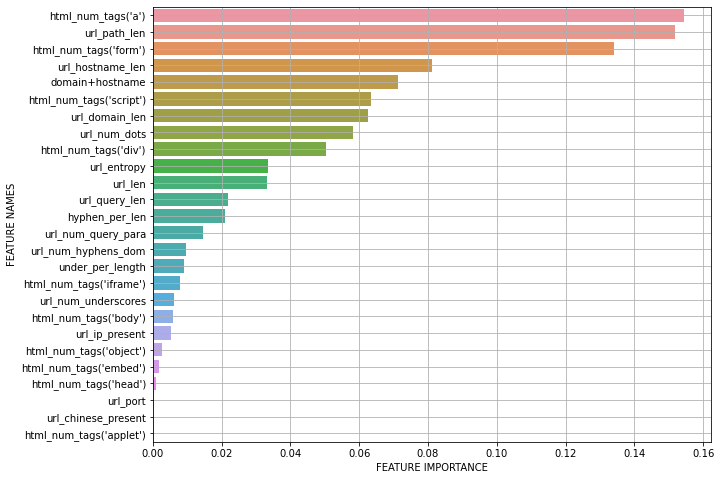

In [541]:
plot_feature_importance(m_gs2.best_estimator_.feature_importances_, x_train.columns)

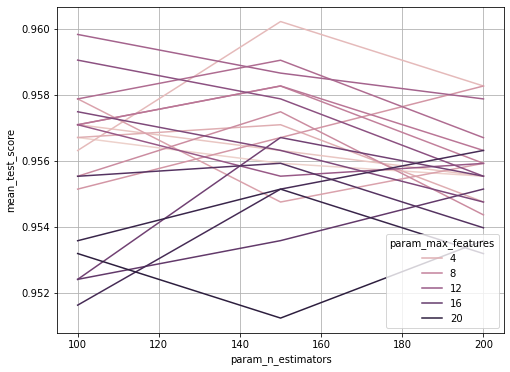

In [506]:
results2 = pd.DataFrame(m_gs2.cv_results_)
tmp2 = results2.loc[:, ['param_n_estimators', 'mean_test_score', 'param_max_features']]

plt.figure(figsize=(8, 6))
sns.lineplot(x = 'param_n_estimators', y='mean_test_score', data=tmp2, hue='param_max_features')
plt.grid()
plt.show()

## 모델링3 : XGB

In [305]:
params = {
    'max_depth' : [3, 5, 8],
    'n_estimators' : [50, 100, 150],
    'learning_rate' : np.linspace(0.1, 0.2, 3)
}

In [308]:
model3 = XGBClassifier()
m_gs3 = GridSearchCV(model3, params, cv=5, verbose=3)

In [311]:
y_train.replace(['benign', 'malicious'], [1, 0], inplace=True)

In [312]:
m_gs3.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth

[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=150; total time=   0.0s
[CV 1/5] END learn

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...hot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
         

In [313]:
y_val.replace(['benign', 'malicious'], [1, 0], inplace=True)

In [319]:
pred3 = m_gs3.predict(test_data)

In [320]:
pred3 = pd.DataFrame(pred3)

In [321]:
pred3

,0
0,1
1,0
2,1
3,0
4,0
...,...
2436,1
2437,1
2438,1
2439,0


In [322]:
pred3.replace([1, 0], [1, -1])

,0
0,1
1,-1
2,1
3,-1
4,-1
...,...
2436,1
2437,1
2438,1
2439,-1


In [323]:
submit3 = pd.DataFrame({
    'id': range(0, len(pred3)),
    'expected': pred3.loc[:, 0]
})

In [324]:
submit3.to_csv('submission3.csv',index = False)